In [0]:
import keras

Using TensorFlow backend.


In [0]:
pip install image-classifiers

     |████████████████████████████████| 81kB 6.8MB/s 


In [0]:
from classification_models.resnet import ResNet18, preprocess_input

base_model = ResNet18((32, 32, 3), weights='imagenet', include_top=False)


W0703 12:19:36.139189 140634422200192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 12:19:36.200469 140634422200192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0703 12:19:36.201933 140634422200192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0703 12:19:36.203217 140634422200192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0703 12:19:36.204609 140634

44924928/44920640 [==============================] - 2s 0us/step


In [0]:
from keras.utils import plot_model
plot_model(base_model, to_file='model.png')
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
from keras.datasets import cifar10
from skimage.transform import resize
import numpy as np
from keras.utils.np_utils import to_categorical
from classification_models.resnet import preprocess_input

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# prepare your data
X = x_train
y = y_train
# create output catagorical
train_y=to_categorical(y)
train_y=np.array(train_y)

#resized_xtrain = np.resize(x_train,(50000, 224,224, 3)) 
X1 = preprocess_input(X)
print(X1.shape)

170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(50000, 32, 32, 3)


In [0]:
# Freeze the layers of base_model
for layer in base_model.layers:
    layer.trainable = False
  
for layer in base_model.layers[-14:]:
  layer.trainable = True

# Check the trainable status of the individual layers
for layer in base_model.layers:
     print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fe7b76b1080> False
<keras.layers.normalization.BatchNormalization object at 0x7fe7deeaec50> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7fe7b70295f8> False
<keras.layers.convolutional.Conv2D object at 0x7fe7b02088d0> False
<keras.layers.normalization.BatchNormalization object at 0x7fe7b014e908> False
<keras.layers.core.Activation object at 0x7fe7b0174a58> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7fe7b0110ef0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe7b012a160> False
<keras.layers.normalization.BatchNormalization object at 0x7fe7b0174208> False
<keras.layers.core.Activation object at 0x7fe7b00b8f98> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7fe7b000ed68> False
<keras.layers.convolutional.Conv2D object at 0x7fe76c1e0ac8> False
<keras.layers.normalization.BatchNormalization object at 0x7fe76c1c3eb8> False
<keras.layers.core.Activation object at 0x7fe76c19c8d0> False
<keras

In [0]:
from keras.models import Model
from keras.layers import Dense, Activation, GlobalAveragePooling2D, Conv2D
n_classes=10

x = Conv2D(n_classes, (1,1),strides=(1,1), padding='same', name='Conv_1', use_bias=False)(base_model.output)
#x= Dense(10, activation='relu')(base_model.output)
x = GlobalAveragePooling2D()(x)
predictions = Activation('softmax')(x)

#model.add(Dense(32, activation='relu', input_dim=100))

# let's add a fully-connected layer
#x2= Dense(100, activation='relu')(x1)
# and a logistic layer -- let's say we have 200 classes
#predictions = Dense(10, activation='softmax')(x1)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
 from keras import optimizers
 sgd = optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
 model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
 model.fit(X1, train_y, epochs=10)

W0703 12:19:56.816888 140634422200192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0703 12:19:56.952963 140634422200192 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
50000/50000 [==============================] - 56s 1ms/step - loss: 1.3429 - acc: 0.5331
Epoch 2/10
50000/50000 [==============================] - 51s 1ms/step - loss: 1.1043 - acc: 0.6116
Epoch 3/10
50000/50000 [==============================] - 52s 1ms/step - loss: 1.0175 - acc: 0.6413
Epoch 4/10
50000/50000 [==============================] - 51s 1ms/step - loss: 0.9619 - acc: 0.6602
Epoch 5/10
50000/50000 [==============================] - 52s 1ms/step - loss: 0.9132 - acc: 0.6773
Epoch 6/10
50000/50000 [==============================] - 51s 1ms/step - loss: 0.8711 - acc: 0.6940
Epoch 7/10
50000/50000 [==============================] - 51s 1ms/step - loss: 0.8249 - acc: 0.7109
Epoch 8/10
50000/50000 [==============================] - 51s 1ms/step - loss: 0.7939 - acc: 0.7187
Epoch 9/10
50000/50000 [==============================] - 51s 1ms/step - loss: 0.7522 - acc: 0.7340
Epoch 10/10
50000/50000 [==============================] - 51s 1ms/step - loss: 0.7137 - acc: 0.7460

In [0]:
import numpy as np
from keras.utils.np_utils import to_categorical
from classification_models.resnet import preprocess_input


#resized_xtrain = np.resize(x_train,(50000, 224,224, 3)) 
Xtest = preprocess_input(x_test)
print(Xtest.shape)

(10000, 32, 32, 3)


In [0]:
preds = model.predict(x_test)
class_idx = np.argmax(preds[100])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("stage2_unit2_conv2")

In [0]:
import keras.backend as K

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test])
for i in range(128):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

(32, 32, 3)


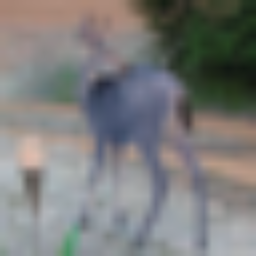

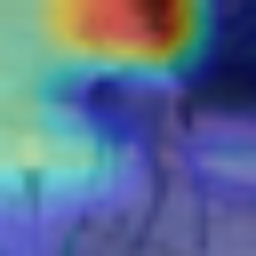

-1

In [0]:
import cv2
from google.colab.patches import cv2_imshow
img = x_test[100]
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

print(img.shape)

img = cv2.resize(img,(256,256))

cv2_imshow(img)
superimposed_img = cv2.resize(superimposed_img,(256,256))

cv2_imshow(superimposed_img)
cv2.waitKey(0)

In [0]:
import keras.backend as K
#from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


fig=plt.figure(figsize=(256, 256))
columns = 10
rows = 10

count = 0
for i in range(0,(len(preds)-1)):
  if(count!=50):    
    class_idx = np.argmax(preds[i])
    if (y_test[i]!=class_idx):
      print(y_test[i])
      print(class_idx)
      count = count+1
      class_output = model.output[:, class_idx]
      last_conv_layer = model.get_layer("stage2_unit2_conv2")
      grads = K.gradients(class_output, last_conv_layer.output)[0]
      pooled_grads = K.mean(grads, axis=(0, 1, 2))
      iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
      pooled_grads_value, conv_layer_output_value = iterate([x_test])
      for cc in range(128):
          conv_layer_output_value[:, :, cc] *= pooled_grads_value[cc]

      heatmap = np.mean(conv_layer_output_value, axis=-1)
      heatmap = np.maximum(heatmap, 0)
      heatmap /= np.max(heatmap)
      
      img = x_test[i]
      heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
      heatmap = np.uint8(255 * heatmap)
      heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
      superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

     # print(img.shape)

      img = cv2.resize(img,(256,256))

      cv2_imshow(img)
      superimposed_img = cv2.resize(superimposed_img,(256,256))
      cv2_imshow(superimposed_img)

In [0]:
  
      #cv2_imshow(img)
      superimposed_img = cv2.resize(superimposed_img,(256,256))
      fig.add_subplot(rows, columns, count)
      plt.imshow(img)
      fig.add_subplot(rows, columns, count+1)
      plt.imshow(superimposed_img)

      #cv2_imshow(superimposed_img,numpy_horizontal)
      #cv2.waitKey(0)
  plt.show()   
  